<a href="https://colab.research.google.com/github/bhavya1234/Data-Science-and-Analytics-Projects/blob/main/Classification_Model_(Drug_Side_Effects).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TCS iON RIO-125: Classification Model - Build a Model that Classifies the Side Effects of a Drug
----------------------------------------------------------------------------------


The dataset obtained from Kaggle, comprising 362,806 rows and 12 columns, lacks the 'name' and 'race' features. To align with the requirements of My internship project titled "TCS iON RIO-125: Classification Model - Build a Model that Classifies the Side Effects of a Drug," we need to augment this dataset appropriately.

To achieve this, i will generate synthetic data for 'name' and 'race' using the Faker library. The 'name' column will represent the name of the patient, and the 'race' column will denote the race of the patient. These new features will be seamlessly concatenated with the existing dataset, enriching it with the required information for my classification model.

In [ ]:
pip install faker

In [ ]:
from faker import Faker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice, sample
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Creating name column with Faker
df1 = Faker()
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(df1.name())
   return name
name = create_names(362806)
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [ ]:
df_name.head()

,Name
0,Joshua Jackson
1,David Middleton
2,Chloe Rodriguez
3,Leroy Gutierrez
4,Jamie Holmes


In [ ]:
df_name.shape

(362806, 1)

In [ ]:
#Creating race column
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list
    #with a chocie from each population

    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'],
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)


In [ ]:
df_race=pd.DataFrame(list, columns = ['Race'])

In [ ]:
df_race.head()

,Race
0,Black
1,Black
2,Hispanic
3,Hispanic
4,White


In [ ]:
#Concatenating name and race columns
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [ ]:
df_drugs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/webmd.csv')

In [ ]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)

In [ ]:
#Converting the dataframe to csv file
data_drugs = data_drugs.to_csv('dataset_drugs.csv', index=False)

##Having now integrated the complete dataset with 'name' and 'race' as additional features, we can proceed to data exploration, preprocessing, and subsequent steps.

In [ ]:
data = pd.read_csv('dataset_drugs.csv')
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Joshua Jackson,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,David Middleton,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Chloe Rodriguez,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Leroy Gutierrez,Hispanic,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Jamie Holmes,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
data.shape

(362806, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [ ]:
data.isnull().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [ ]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180780,Michael Smith,158
Race,362806,4,White,116138
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


*Findings:*

*1. The age group between 45 to 54 exhibits the highest prevalence.*

*2. The number of female patients surpasses that of male patients.*

*3. The utilization of Cymbalta surpasses that of other drugs in the dataset*.*italicised text* *italicised text*

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

1

In [ ]:
#Identifying unique instances within every feature
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 180780 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



*Analysis Summary:*



*1.   There are four distinct racial categories within the dataset.*

*2.   The variable 'Sex' is categorized into three distinct groups.*

*3.   The variable 'Drug' contains a higher number of unique values compared to 'DrugId'.*

*4.   'Condition' exhibits a lower count of unique values compared to 'Drug' or 'DrugId'.*

*5.   Approximately 70% of the values in the 'Reviews' feature are distinct.*









In [ ]:
# Listing the categorical variables.
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [ ]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '_' * 80)


 Name 
 ['Joshua Jackson' 'David Middleton' 'Chloe Rodriguez' ...
 'Adriana Harrison' 'Carl Shannon' 'Kristina Greer'] 
 ________________________________________________________________________________

 Race 
 ['Black' 'Hispanic' 'White' 'Asian'] 
 ________________________________________________________________________________

 Age 
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6'] 
 ________________________________________________________________________________

 Condition 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 
 ________________________________________________________________________________

 Date 
 ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019'] 
 ________________________________________________________________________________

 Drug 
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' .

In [ ]:
data['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [ ]:
data['DrugId'].value_counts()

6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: DrugId, Length: 6572, dtype: int64

In [ ]:
data['Drug'].value_counts().head(20)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

### Drug selection: For creating a classification model to identify side effects, a specific drug named Topamax with DrugId 14494 is considered.

In [ ]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Cindy West,White,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191575,Kimberly Clark,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191582,Samantha Pennington,White,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191589,Rodney Welch,White,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191596,Nicholas Torres,White,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [ ]:
drug_topamax['Condition'].value_counts()

Migraine Prevention                                1380
Other                                               460
Simple Partial Seizures                              68
Convulsive Seizures                                  63
Tonic-Clonic Epilepsy                                48
Additional Medication to Treat Partial Seizures      48
Habit of Drinking Too Much Alcohol                   27
Essential Tremor                                     24
Additional Medication for Tonic-Clonic Epilepsy      15
Involuntary Quivering                                10
Epilepsy of the Lennox Gastaut Syndrome               4
Binge Eating Disorder                                 1
Name: Condition, dtype: int64

In [ ]:
drug_topamax['Condition'].value_counts().sum()

2148

In [ ]:
data_new = drug_topamax.copy()
data_copy = data.copy()

#----------------------------------------- DATA PRE-PROCESSING -----------------------------------------



1. Handling Instances With Whitespaces

In [ ]:

for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Cindy West,White,45-54,Migraine Prevention,9/22/2019,topamax,14494.0,4.0,4.0,"I was on this drug for 5 years, 100mg for the ...",1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",5.0
191575,Kimberly Clark,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494.0,4.0,4.0,I have partial seizures. It didn't help for a ...,4.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191582,Samantha Pennington,White,13-18,Migraine Prevention,8/9/2019,topamax,14494.0,1.0,1.0,I have been having migraines and headaches eve...,1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",6.0
191589,Rodney Welch,White,65-74,Essential Tremor,7/21/2019,topamax,14494.0,4.0,4.0,This is the only medication I have taken for t...,3.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191596,Nicholas Torres,White,45-54,Migraine Prevention,4/30/2019,topamax,14494.0,5.0,5.0,I suffered from debilitating Cluster Headaches...,5.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",2.0


 2.Checking Missing Values

In [ ]:
data_new.isnull().sum()

Name               0
Race               0
Age               75
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

In [ ]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [ ]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
data_new.shape

(1830, 14)

Converting non-string data types in specific columns ('Sides', 'Reviews', 'Condition') of the DataFrame data_new into string data types.

1.Converting 'Sides' Column to String:

2.Converting 'Reviews' Column to String:

3.Converting 'Condition' Column to String:

In [ ]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

The cleaning_text function takes a string (i) as input, applies a series of regular expression-based text cleaning operations (removing non-alphabetic characters, digits, and special characters), tokenizes the text, and filters out short words (less than 4 characters). The cleaned and filtered text is then returned.

In [ ]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))


Lets do cleaning and processing the **'Sides'  , 'Review' , 'Condition** 'column in a DataFrame named data_new using a function called cleaning_text.
The apply() function in pandas is used to apply a function along the axis of a DataFrame, which in this case is applied to the 'Sides' column. The purpose of this code is to clean or preprocess the text data in the 'Sides' column using the cleaning_text function. The cleaned or processed 'Sides' column is then displayed using data_new.Sides. The specifics of the cleaning_text function and the exact nature of the text cleaning would require looking at the definition of cleaning_text , same for other two.








In [ ]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

Remove stopwords

Removing stopwords can be important to improve the accuracy and efficiency of the analysis by reducing the noise in the data and focusing on more meaningful words and phrases. However, the set of stopwords can vary based on the context of the analysis and may include additional domain-specific words.

Stopwords can be different for various languages, and libraries like NLTK (Natural Language Toolkit) provide predefined sets of stopwords for different languages, making it easier to perform this common preprocessing step in text analysis.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_new['Sides']

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

In [ ]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

191610    years when this medication when mild seizure n...
191624    topamax chronic vomiting only took weeks befor...
191631    taking gabapentin central neuropathy wondering...
191638    have been taking topamax exactly four years mi...
191645    suffer with spinal degeneration that supposed ...
                                ...                        
197200    first weeks felt great took ptsd symptoms away...
197201    have tried just about everything there help wi...
197202    have rash around neck after started taking top...
197203    have read some reviews happy realize that goin...
197204    topamax worked great until started have short ...
Name: Reviews, Length: 1830, dtype: object

In [ ]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_new['Reviews']

191610    I'm 30 years old, I 12 I put medication. When ...
191624    I put 50mg day topamax chronic vomiting. I too...
191631    I'm taking Gabapentin Central Neuropathy!! I w...
191638    I taking Topamax exactly four years migraine p...
191645    I suffer spinal degeneration I supposed daily ...
                                ...                        
197200    The first 3 weeks I felt great---it took lot P...
197201    I tried everything help migrianes. Nothing wor...
197202    I rash around neck I started taking Topamax. I...
197203    I read reviews happy realize "I" going crazy a...
197204    Topamax worked great, I started short term mem...
Name: Reviews, Length: 1830, dtype: object

In [ ]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

191610    simple partial seizures
191624                      other
191631                      other
191638        migraine prevention
191645                      other
                   ...           
197200                      other
197201        migraine prevention
197202                      other
197203    simple partial seizures
197204        migraine prevention
Name: Condition, Length: 1830, dtype: object

In [ ]:
data_new['Age'].value_counts()

45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
7-12            8
75 or over      8
3-6             3
0-2             2
Name: Age, dtype: int64

In [ ]:
data_new['Age'].unique()

array(['7-12', '25-34', '45-54', '65-74', '55-64', '35-44', '19-24',
       '13-18', '75 or over', '3-6', '0-2'], dtype=object)

In [ ]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [ ]:
data_new['Age'].value_counts()

45-54     463
35-44     455
25-34     423
55-64     196
19-24     184
13-18      51
65-74      37
7-12        8
75-100      8
3-6         3
0-2         2
Name: Age, dtype: int64

# ----------------------------------------- Outliers detection -----------------------------------------

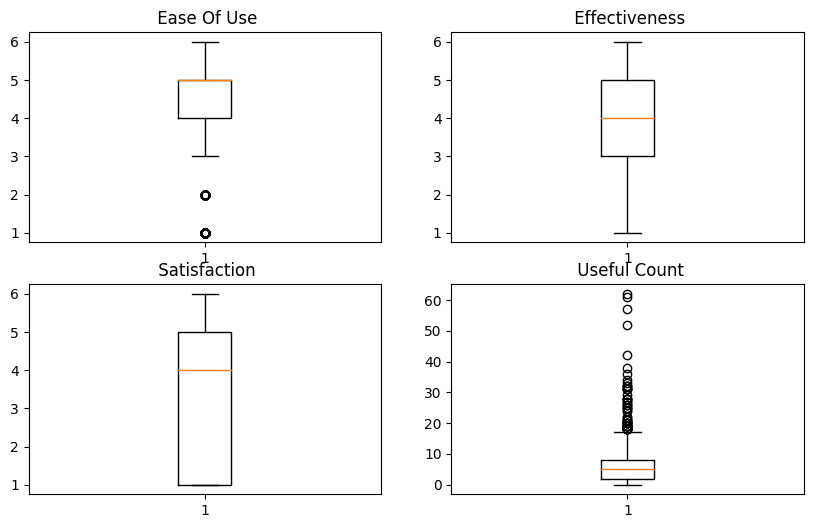

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

# ----------------------------------------- Removing outliers -----------------------------------------

In [ ]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [ ]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[191785,
 191911,
 191925,
 191939,
 192009,
 192016,
 192023,
 192030,
 192058,
 192275,
 192317,
 192492,
 192888,
 193037,
 193082,
 193286,
 193316,
 193319,
 193337,
 193340,
 193472,
 193502,
 193505,
 193508,
 193520,
 193535,
 193571,
 194130,
 194146,
 194264,
 194282,
 194300,
 194336,
 194344,
 194390,
 194496,
 194740,
 194818,
 194890,
 194914,
 194946,
 195358,
 195382,
 195420,
 195448,
 195494,
 195526,
 195940,
 195988,
 196040,
 196076,
 196134,
 196162,
 196340,
 196400,
 196410,
 196510,
 196756,
 196774,
 197000,
 197184,
 197188,
 197198,
 191624,
 191631,
 191757,
 191862,
 191911,
 191939,
 192128,
 192135,
 192142,
 192163,
 192219,
 192226,
 192289,
 192303,
 192317,
 192324,
 192457,
 192485,
 192499,
 192527,
 192548,
 192674,
 192737,
 192779,
 192800,
 192929,
 192959,
 192965,
 193022,
 193025,
 193031,
 193055,
 193085,
 193118,
 193124,
 193151,
 193178,
 193274,
 193331,
 193352,
 193394,
 193436,
 193445,
 193514,
 193517,
 193586,
 193607,
 193616,
 

In [ ]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [ ]:
data_new.shape

(1830, 14)

In [ ]:
data_new=remove(data_new,index_list)

In [ ]:
data_new.shape

(1548, 14)

Text(0.5, 1.0, 'Box plot of Useful Count')

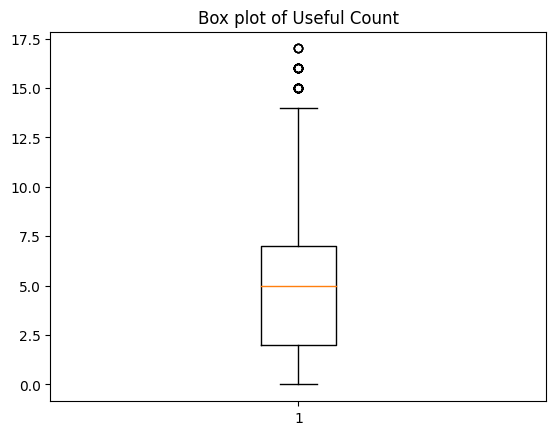

In [ ]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')


Text(0.5, 1.0, 'Box plot of Ease Of Use')

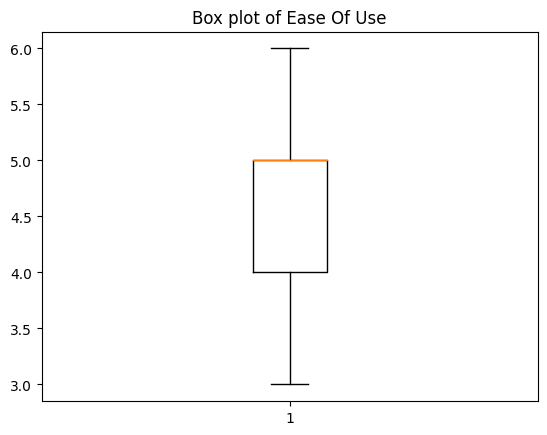

In [ ]:
plt.boxplot(data_new["EaseofUse"])
plt.title('Box plot of Ease Of Use')

In [ ]:
data_new['Satisfaction'].value_counts()

5.0    545
4.0    334
1.0    309
3.0    229
2.0    130
6.0      1
Name: Satisfaction, dtype: int64

In [ ]:
data_new[data_new['Satisfaction'] > 5]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195282,Erika Banks,Asian,35-44,migraine prevention,5/18/2009,topamax,14494.0,6.0,6.0,ahoj som zo slovenska dlhe roky mam migreny tu...,6.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0


In [ ]:
#Deleting values greater than 5 from Satisfaction column
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


#----------------------------------------- FEATURE ENGINEERING -----------------------------------------

Creation of a new SideEffects column

In [ ]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [ ]:
data_new['SideEffects']=data1

In [ ]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1) # Since DrugId is the same, dropping the column

In [ ]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
191610,Amber Martin,Black,7-12,simple partial seizures,2/26/2019,topamax,4.0,5.0,"I'm 30 years old, I 12 I put medication. When ...",Male,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191638,Wendy Hampton,White,65-74,migraine prevention,6/22/2014,topamax,5.0,5.0,I taking Topamax exactly four years migraine p...,Female,tiredness drowsiness dizziness loss coordinati...,9.0,Extreme
191645,Deanna Green,White,55-64,other,12/27/2018,topamax,5.0,5.0,I suffer spinal degeneration I supposed daily ...,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191652,Kevin Gonzalez,Hispanic,45-54,migraine prevention,12/17/2018,topamax,5.0,3.0,I taking 50 mg 2x day since 11/30/18. The firs...,Female,tiredness drowsiness dizziness loss coordinati...,7.0,Mild
191659,Brandy Myers,Black,25-34,tonic clonic epilepsy,10/18/2018,topamax,5.0,5.0,The important thin I want say Topamax medicine...,Male,tiredness drowsiness dizziness loss coordinati...,1.0,Extreme


In [ ]:
data_copy = data_new.copy()

# -----------------------------------------  FEATURE REDUCTION -----------------------------------------

the Drug and Sides columns were omitted. Other columns such as Date, Name, Reviews, and UsefulCount are also removed because they do not deal with drug side effects.

In [ ]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Black,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,White,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,White,55-64,other,5.0,5.0,Female,Extreme
3,Hispanic,45-54,migraine prevention,5.0,3.0,Female,Mild
4,Black,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


#-----------------------------------------ENCODING-----------------------------------------

-> Changing datatype of Catogorical value

In [ ]:

for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [ ]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Black,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,White,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,White,55-64,other,5.0,5.0,Female,Extreme
3,Hispanic,45-54,migraine prevention,5.0,3.0,Female,Mild
4,Black,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:
    data_new[col]=label.fit_transform((data_new[col]).astype(str))

data_label=data_new

In [ ]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,1,9,10,4.0,5.0,1,0
1,3,8,8,5.0,5.0,0,0
2,3,7,9,5.0,5.0,0,0
3,2,6,8,5.0,3.0,0,1
4,1,3,11,5.0,5.0,1,0


In [ ]:
data_new.shape

(1547, 7)

 # ----------------------------------------- SCALING -----------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [ ]:
data_new.shape

(1547, 7)

In [ ]:
data_model = data_new.copy()

#----------------------------------------- EXPLORATORY DATA ANALYSIS-----------------------------------------

1. Top 20 Drugs

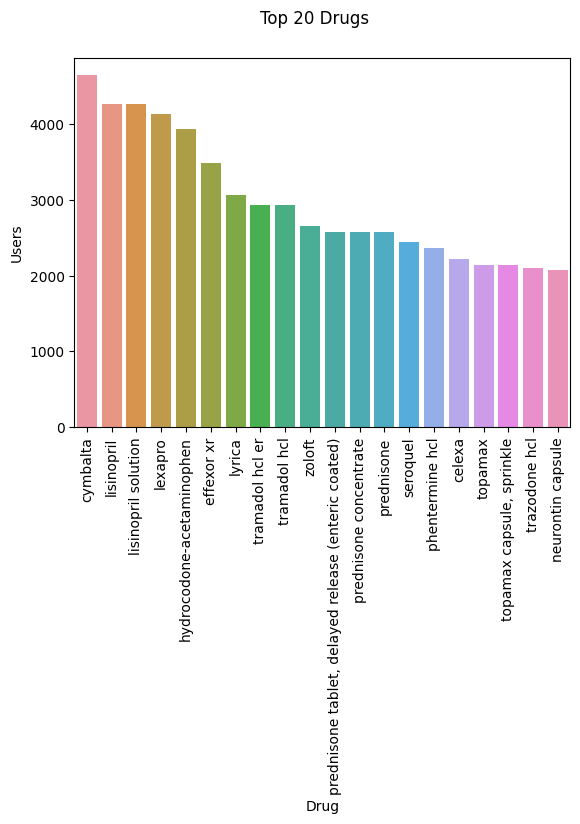

In [ ]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

2. Top 20 Conditions

Text(0, 0.5, 'Users')

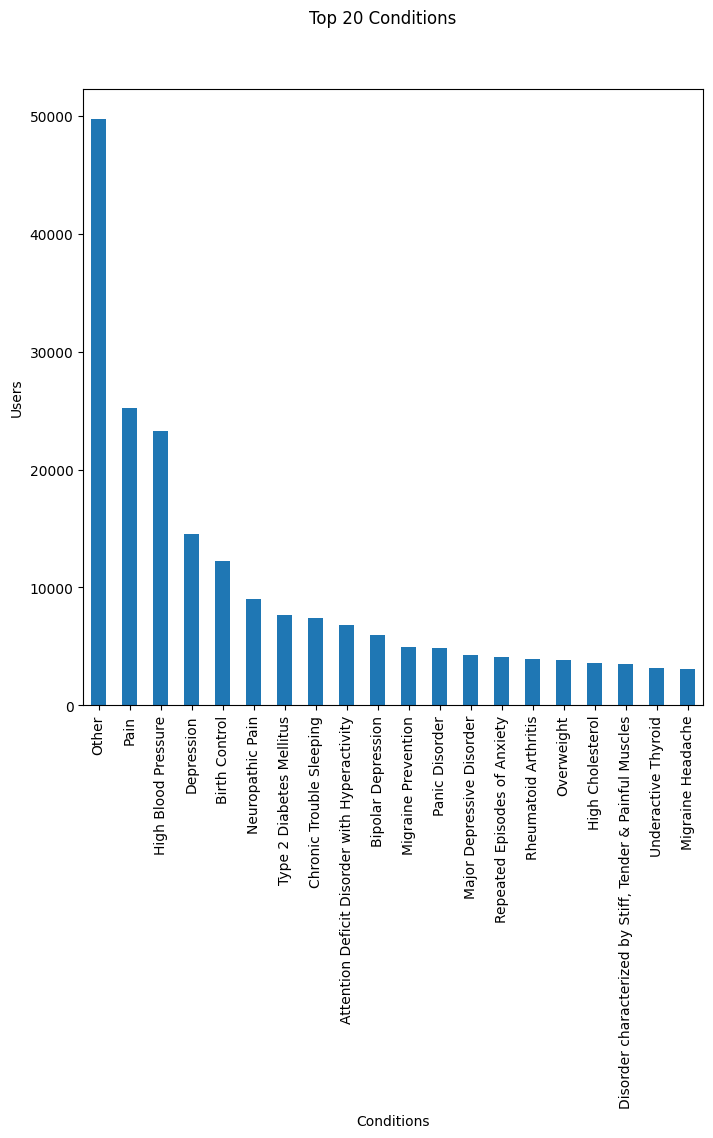

In [ ]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

3. Conditions - Topamax

Text(0, 0.5, 'Count')

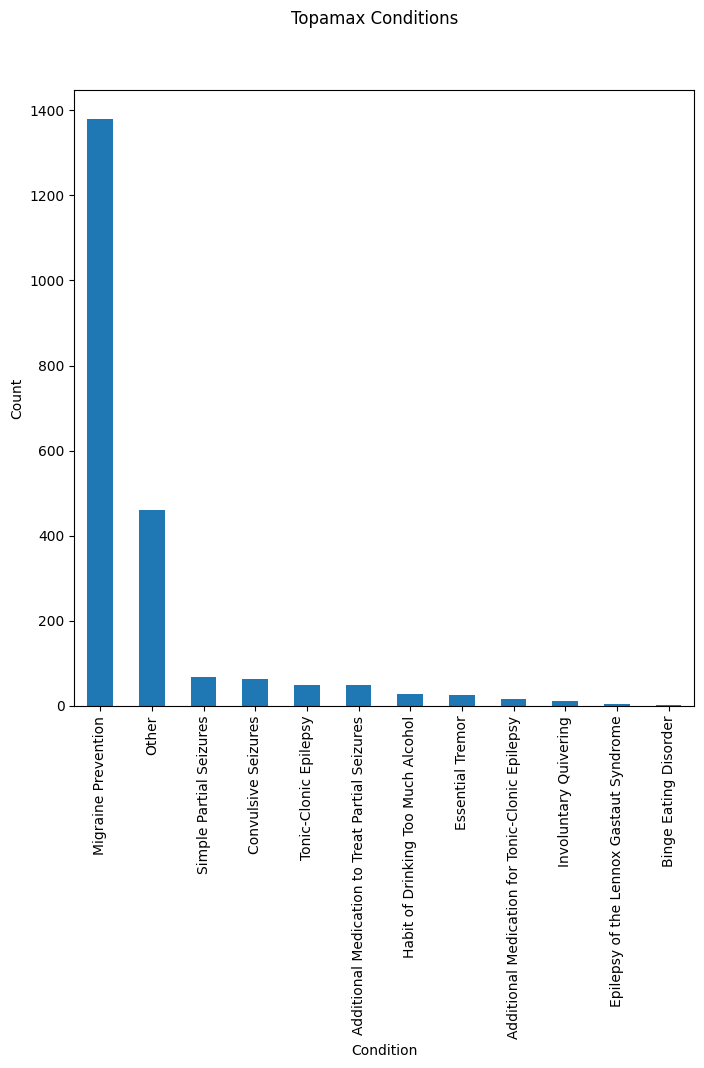

In [ ]:
drug_topamax['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Topamax Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

4. Users by Gender - Topamax

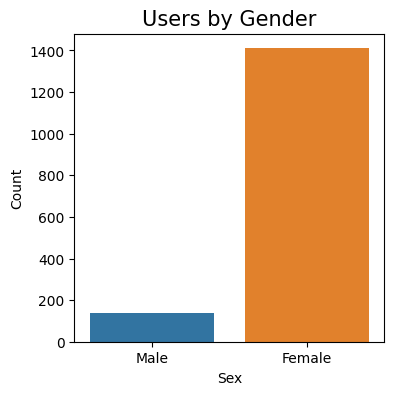

In [ ]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

5. Users by Race - Topamax

Text(0, 0.5, 'Count')

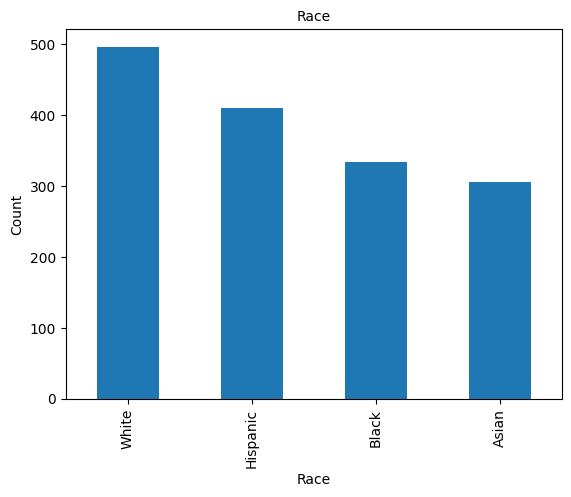

In [ ]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

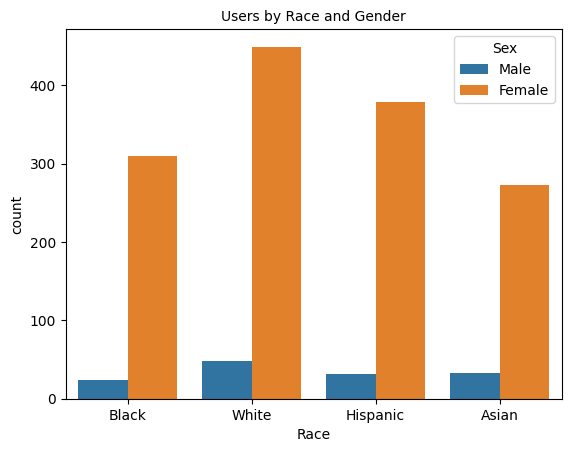

In [ ]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

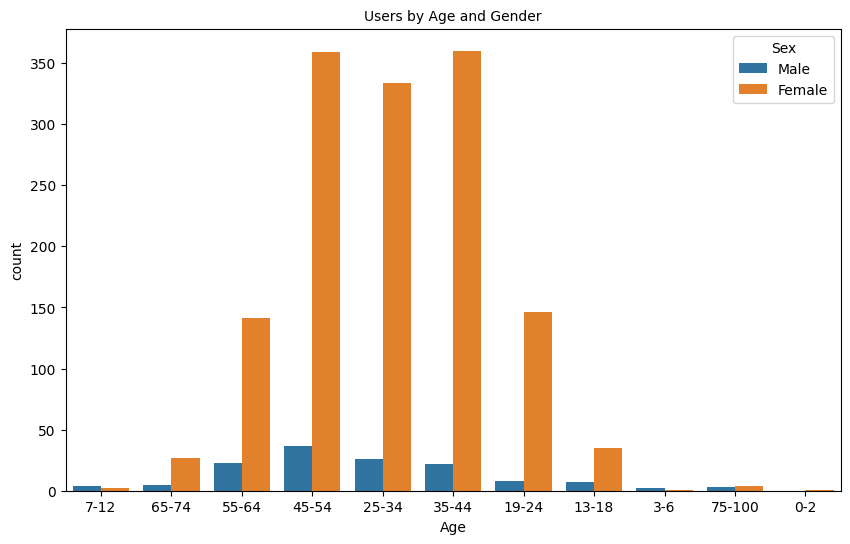

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

8. Correlation Heatmap

<Axes: >

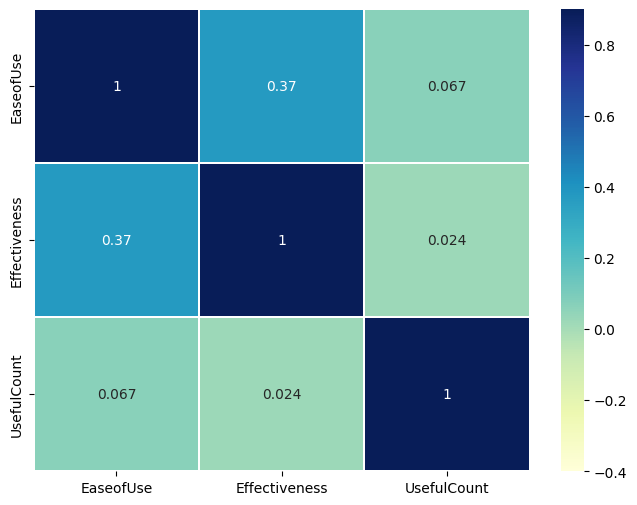

In [ ]:
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

9. Yearly Reviews - Topamax

In [ ]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [ ]:
data_copy['Year'] = data_copy['Date'].dt.year #extracting year from Date

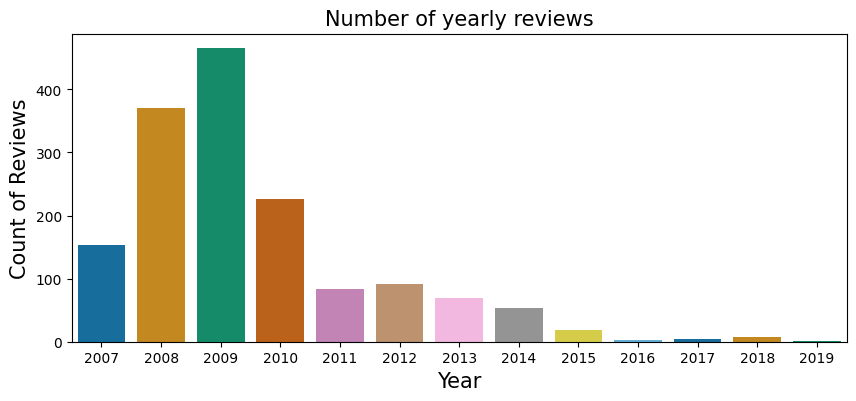

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Year', data=data_copy, palette='colorblind')
plt.title('Number of yearly reviews', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()


10. Effectiveness

Text(0, 0.5, 'Count')

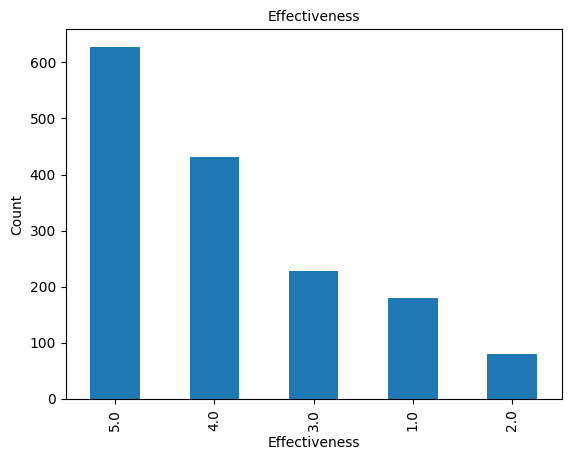

In [ ]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

11. Ease of Use

Text(0, 0.5, 'Count')

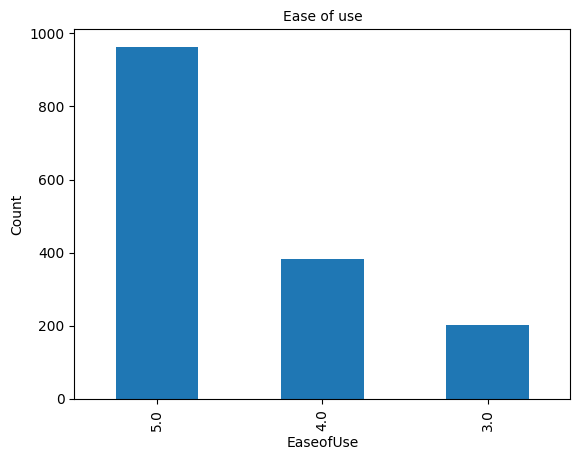

In [ ]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)


12. Useful Count

Text(0, 0.5, 'Count')

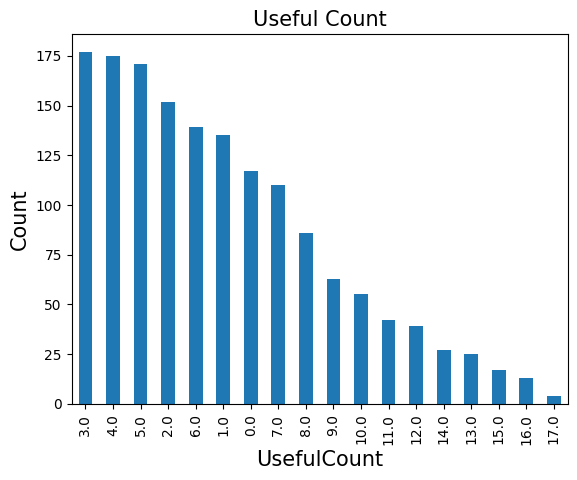

In [ ]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

13. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

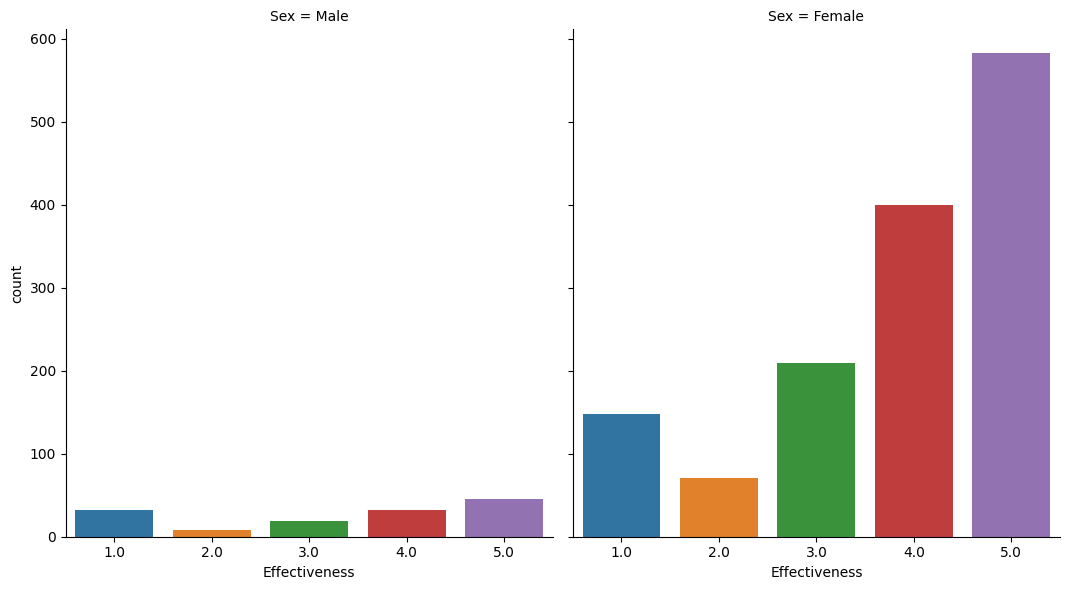

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);


14. Side Effects

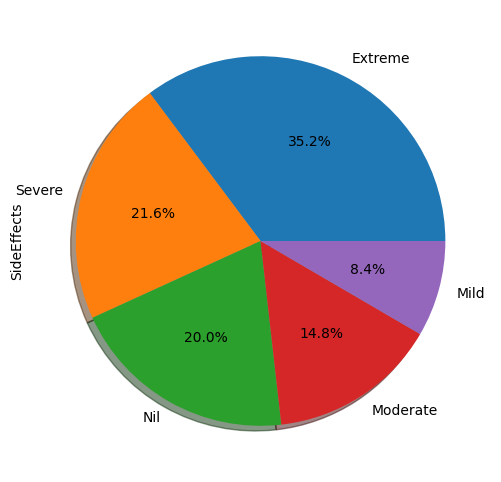

In [ ]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

15. Side Effects and Age

<Axes: xlabel='Age', ylabel='count'>

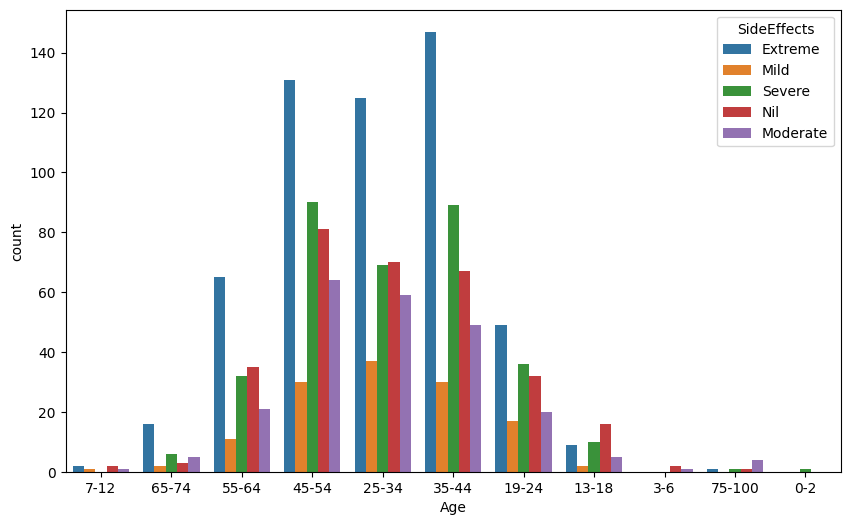

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

 16. Side Effects and Gender


<Figure size 2000x1000 with 0 Axes>

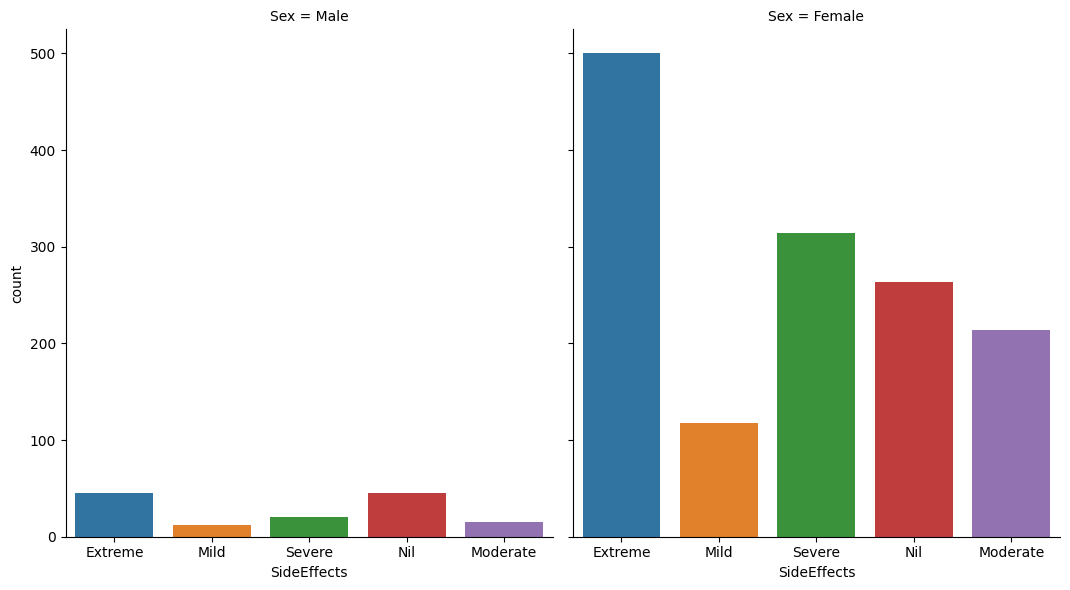

In [ ]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

17. Side Effects and Race

<Axes: xlabel='Race', ylabel='count'>

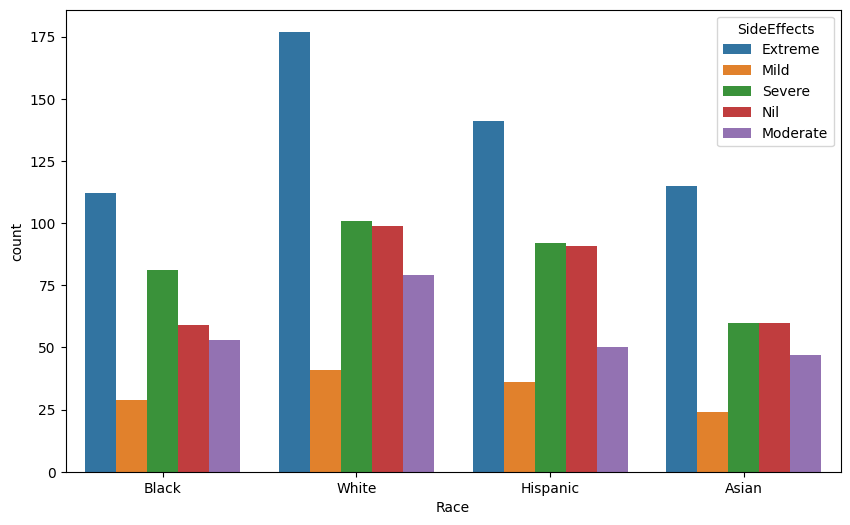

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

#----------------------------------------- SPLITTING THE DATA -----------------------------------------

##Splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_new.drop(['SideEffects'],axis=1)
y = data_new['SideEffects']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

# ----------------------------------------- MODELLING -----------------------------------------

## 1. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

*Performance* *Evaluation*

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.83870967741935


*Confusion Matrix of Logistic Regression Model*

In [ ]:
confusion_matrix(y_test,y_pred)

array([[89,  0,  0,  1, 18],
       [ 1,  0,  4, 16,  5],
       [10,  0,  6, 21, 16],
       [ 7,  0,  5, 41, 10],
       [15,  0,  5,  6, 34]])

##2. KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc
#append these accuracy values to my list
    acc_values.append(acc)

In [ ]:
acc_values

[0.5290322580645161,
 0.5483870967741935,
 0.5064516129032258,
 0.5,
 0.5129032258064516,
 0.5161290322580645,
 0.5193548387096775,
 0.5161290322580645,
 0.535483870967742,
 0.5516129032258065,
 0.5548387096774193,
 0.5483870967741935]

To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

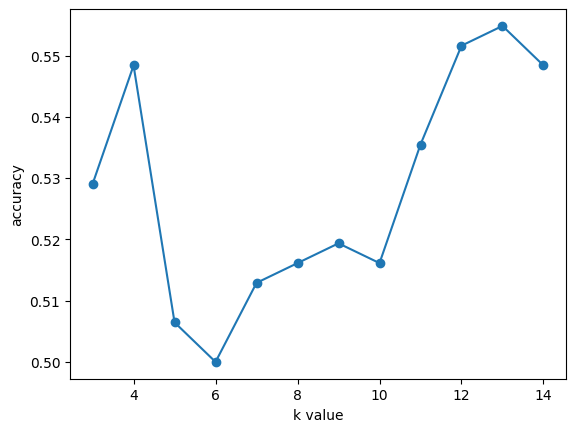

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

*Performance Evaluation*

In [ ]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.83870967741935


*Confusion Matrix for KNN Classifier*

In [ ]:
confusion_matrix(y_test,y_pred)

array([[96,  0,  5,  0,  7],
       [ 4,  4,  4,  9,  5],
       [18,  3, 11,  5, 16],
       [10,  3, 11, 30,  9],
       [20,  1,  9,  1, 29]])

##3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

*Performance Evaluation*

In [ ]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.483870967741936


*Confusion Matrix of Decision Tree Model*

In [ ]:
confusion_matrix(y_test,y_pred)

array([[93,  0,  4,  2,  9],
       [ 2,  7,  5,  8,  4],
       [13,  9, 14,  5, 12],
       [ 8, 12, 10, 30,  3],
       [17,  3,  9,  3, 28]])

## 4. Support Vector Machine

##4.1 Linear SVM
_____________________

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  57.41935483870968


In [ ]:
confusion_matrix(y_test,y_pred)

array([[88,  0,  1,  0, 19],
       [ 1,  1,  9, 10,  5],
       [ 7,  0, 18,  8, 20],
       [ 6,  2, 10, 35, 10],
       [14,  1,  8,  1, 36]])

## 4.2  Polynomial SVM
__________________

In [ ]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.19354838709678


In [ ]:
confusion_matrix(y_test,y_pred)

array([[88,  0,  0,  0, 20],
       [ 1,  0,  7, 11,  7],
       [ 9,  0, 11, 11, 22],
       [ 8,  0,  6, 32, 17],
       [16,  0,  3,  4, 37]])

## 4.3 Radial SVM
_________

In [ ]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  56.12903225806451


In [ ]:
confusion_matrix(y_test,y_pred)

array([[94,  0,  0,  0, 14],
       [ 1,  0,  4, 10, 11],
       [10,  0,  7,  5, 31],
       [ 7,  0,  6, 33, 17],
       [16,  0,  3,  1, 40]])

## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train) #training the model
y_pred=rf.predict(X_test) #to make predictions

In [ ]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.80645161290323


In [ ]:
confusion_matrix(y_test,y_pred)

array([[92,  0,  3,  2, 11],
       [ 2,  4,  7,  9,  4],
       [10,  7, 14,  7, 15],
       [ 7,  4, 12, 33,  7],
       [17,  1,  8,  4, 30]])

Feature Importance

In [ ]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    43.386241
Age              19.046692
Condition        12.722378
Race             11.519679
EaseofUse        10.942625
Sex               2.382387
dtype: float64

HYPER PARAMETER TUNNING

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [ ]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [ ]:
y_pred=rft.predict(X_test)

In [ ]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.387096774193544


## 6. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  57.41935483870968


In [ ]:
confusion_matrix(y_test,y_pred)

array([[92,  1,  0,  0, 15],
       [ 1,  3,  8,  8,  6],
       [10,  6, 17,  5, 15],
       [ 7,  3, 13, 32,  8],
       [14,  1,  8,  3, 34]])

## 7. Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [ ]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  59.03225806451613


In [ ]:
confusion_matrix(y_test,y_pred)

array([[95,  1,  2,  0, 10],
       [ 1,  7,  5,  7,  6],
       [ 9,  6, 17,  6, 15],
       [ 7,  3, 11, 34,  8],
       [16,  4,  6,  4, 30]])



---


# **Accuracies :**

Logistic Regression - 54.84%

KNN Model - 54.84%

Decision Tree Classifier - 55.48%

Linear SVM - 57.42%

Polynomial SVM - 54.19%

Radial SVM - 56.13%

Random Forest - 55.81%

Fine-tuning Random Forest - 58.39%

Gradient Boosting - 57.42%

Extreme Gradient Boosting - 59.03%


---



# **Inferences:**

The accuracy scores for the different classification models range from approximately 54.19% to 59.03%.

The highest accuracy was achieved using Extreme Gradient Boosting (XGBoost) with an accuracy of 59.03%, indicating its effectiveness in classifying the side effects of a drug based on the given features.

The accuracy of the models is moderate, suggesting that there is room for improvement to enhance the precision and reliability of the predictions.

________________________________________________________________________________
## **Conclusion:**

In this study, I explored and implemented various classification algorithms to predict and classify the side effects of a drug based on the provided dataset. Each algorithm was evaluated based on its classification accuracy, a crucial metric for assessing model performance.

The results of my experimentation revealed that the performance of the models varied across different algorithms. ***Extreme Gradient Boosting*** (XGBoost) emerged as the most effective algorithm, achieving the highest accuracy of 59.03%. This implies that XGBoost demonstrated superior predictive capabilities in identifying drug side effects from the given features.

While XGBoost demonstrated the highest accuracy, it's important to note that the accuracies of other models, such as Linear SVM, Radial SVM, Fine-tuned Random Forest, and Gradient Boosting, were also promising, ranging from approximately 54.19% to 58.39%. These models showcase potential for further optimization and refinement to achieve even higher prediction accuracies.

It's evident from my analysis that the choice of algorithm significantly impacts the predictive performance. However, achieving optimal performance is an ongoing process that involves continuous experimentation, hyperparameter tuning, and potentially exploring new algorithms or ensemble methods.

To further enhance the predictive capabilities of my models, future steps should involve comprehensive feature engineering to extract the most informative features from the dataset. Additionally, a deeper exploration of hyperparameters and potentially employing ensemble techniques could unlock even greater predictive potential.

In conclusion, this project underscores the importance of selecting appropriate machine learning algorithms and the necessity for continuous refinement and optimization. My findings provide a foundation for further advancements in accurately predicting drug side effects, ultimately contributing to the improvement of healthcare and patient safety.

---
